In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
#The following data gives the sales fgures of 30 popular cars in India, from Jan-21 to Jan-23


df=pd.read_excel(r"C:\Users\MY BOOK\OneDrive\Documents\Data analytics\Feynn Labs\EV segmentation\car sales fig.xlsx", sheet_name='Sheet1', skiprows=1, header=None)

In [35]:
df.columns=['OEM','Model','Price Range','Segment','Jan21','Feb21','Mar21','Apr21','May21','Jun21','Jul21','Aug21','Sep21','Oct21','Nov21','Dec21','Jan22','Feb22','Mar22','Apr22','May22','Jun22','Jul22','Aug22','Sep22','Oct22','Nov22','Dec22','Jan23'
]

In [36]:
df.head()

,OEM,Model,Price Range,Segment,Jan21,Feb21,Mar21,Apr21,May21,Jun21,...,Apr22,May22,Jun22,Jul22,Aug22,Sep22,Oct22,Nov22,Dec22,Jan23
0,Maruti,Wagon R,6.0-9.0,Mini-Hatchback,17165,18728,18757,18656,2086,19447,...,17766,16814,19190,22588,18398,20078,17945,14720,10181,20466
1,Maruti,Swift,6.0-9.0,Hatch,17180,20264,21714,18316,7005,17727,...,8898,14133,16213,17539,11275,11988,17231,15153,12061,16440
2,Maruti,Dzire,6.0-9.0,Sedan,15125,11901,11434,14073,5819,12639,...,10701,11603,12597,13747,11868,9601,12321,14456,11997,11317
3,Tata,Nexon,9.0-15.0,Compact SUV,8225,7929,8683,6938,6439,8033,...,13471,14614,14295,14214,15085,14518,13767,15871,12053,15567
4,Maruti,Alto,3.0-6.0,Mini-Hatchback,18260,16919,17401,17303,3220,12513,...,10443,12933,13790,9065,14388,24844,21260,15663,8648,21411


In [37]:

print(df.shape)

(30, 29)


In [38]:
# The data set has no missing values

df.isnull().sum()

OEM            0
Model          0
Price Range    0
Segment        0
Jan21          0
Feb21          0
Mar21          0
Apr21          0
May21          0
Jun21          0
Jul21          0
Aug21          0
Sep21          0
Oct21          0
Nov21          0
Dec21          0
Jan22          0
Feb22          0
Mar22          0
Apr22          0
May22          0
Jun22          0
Jul22          0
Aug22          0
Sep22          0
Oct22          0
Nov22          0
Dec22          0
Jan23          0
dtype: int64

Text(0.5, 1.0, 'Total number of sales by Segment')

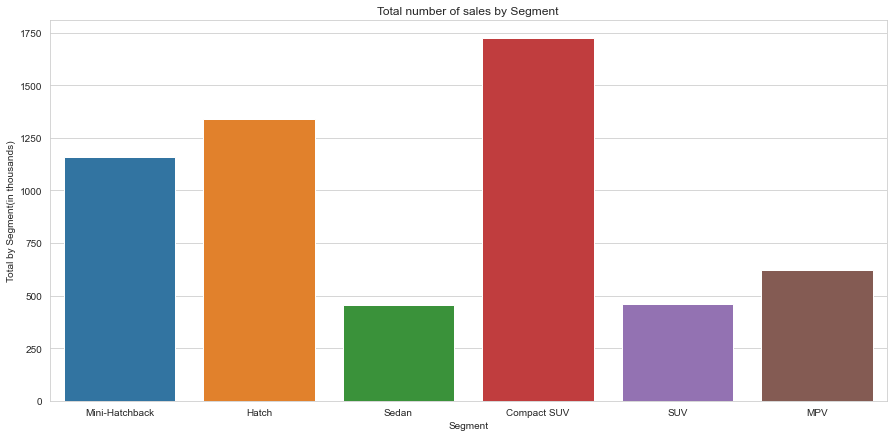

In [82]:
# Observe that the cars belonging to the Compact-SUV and Hatches segments are dominating the sales chart.

grpddata=df.groupby(by=['Segment']).sum().sum(axis=1)/1000

sns.set_style('whitegrid')
plt.figure(figsize=(15,7))
sns.barplot(x=grpddata.index,y=grpddata.values, order=['Mini-Hatchback', 'Hatch', 'Sedan', 'Compact SUV', 'SUV', 'MPV'])
plt.ylabel('Total by Segment(in thousands)')
plt.title('Total number of sales by Segment')

In [70]:
# Observe that the segments of hatches and compact suv's contribute to 73% of the total sales
# The popularity of the remaining three segments are almost alike.
grpddata2=df.groupby(by=['Segment']).sum().sum(axis=1)
df.groupby(by=['Segment']).sum().sum(axis=1)*100/grpddata2.sum()

Segment
Compact SUV       29.937658
Hatch             23.273215
MPV               10.821960
Mini-Hatchback    20.111504
SUV                7.967163
Sedan              7.888501
dtype: float64

Text(0.5, 1.0, 'Total number of sales by Manufacturer')

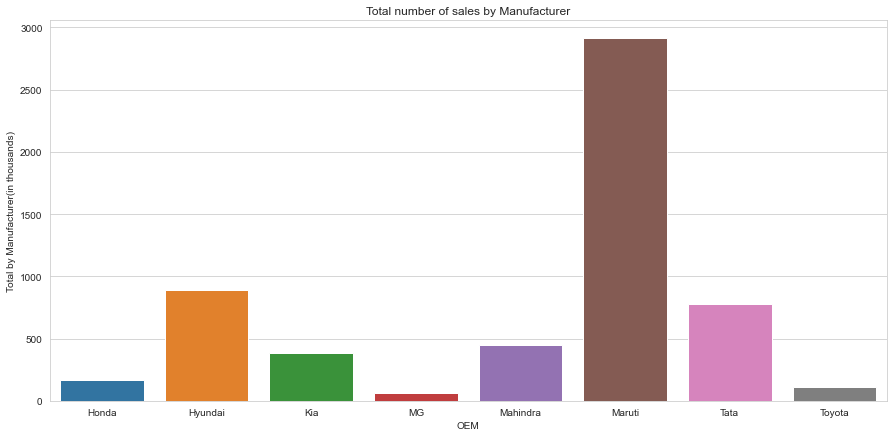

In [74]:
# The brand Maruti surpasses all other manufacturers by a huge margin.  
# The brands Hyundai, Tata and Kia are the other top performers in terms of sales.

grpddata3=df.groupby(by=['OEM']).sum().sum(axis=1)/1000

sns.set_style('whitegrid')
plt.figure(figsize=(15,7))
sns.barplot(x=grpddata3.index,y=grpddata3.values)
plt.ylabel('Total by Manufacturer(in thousands)')
plt.title('Total number of sales by Manufacturer')

Text(0.5, 1.0, 'Total number of sales by Price Range')

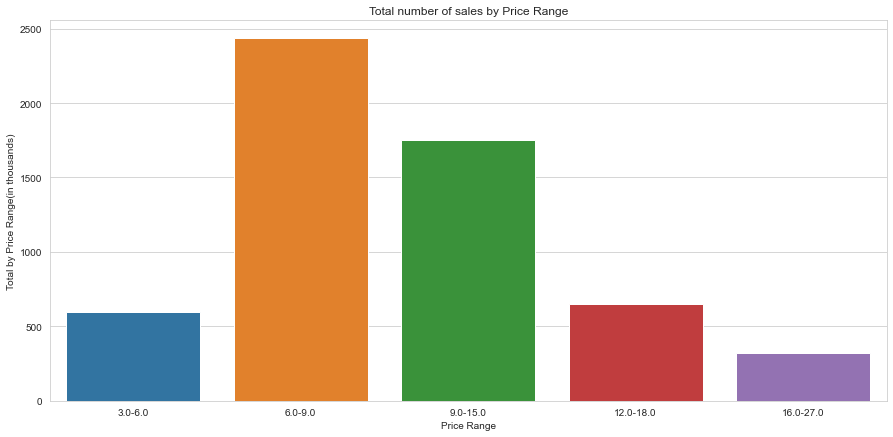

In [83]:


grpddata4=df.groupby(by=['Price Range']).sum().sum(axis=1)/1000

sns.set_style('whitegrid')
plt.figure(figsize=(15,7))
sns.barplot(x=grpddata4.index,y=grpddata4.values, order=['3.0-6.0', '6.0-9.0', '9.0-15.0', '12.0-18.0', '16.0-27.0'])
plt.ylabel('Total by Price Range(in thousands)')
plt.title('Total number of sales by Price Range')

In [ ]:
# Observe that the highest no of sales is in the 6.0-15.0 range

In [93]:

grpdseg.columns

Index(['Jan21', 'Feb21', 'Mar21', 'Apr21', 'May21', 'Jun21', 'Jul21', 'Aug21',
       'Sep21', 'Oct21', 'Nov21', 'Dec21', 'Jan22', 'Feb22', 'Mar22', 'Apr22',
       'May22', 'Jun22', 'Jul22', 'Aug22', 'Sep22', 'Oct22', 'Nov22', 'Dec22',
       'Jan23'],
      dtype='object')

In [94]:
grpdseg=df.groupby(by=['Segment']).sum().reset_index()


grpdseg = grpdseg.melt(id_vars='Segment', var_name='months', value_name='sales')


,Segment,months,sales
0,Compact SUV,Jan21,66251
1,Hatch,Jan21,64430
2,MPV,Jan21,25184
3,Mini-Hatchback,Jan21,56190
4,SUV,Jan21,16165
...,...,...,...
145,Hatch,Jan23,61259
146,MPV,Jan23,22886
147,Mini-Hatchback,Jan23,58362
148,SUV,Jan23,22784


<AxesSubplot:xlabel='months', ylabel='sales'>

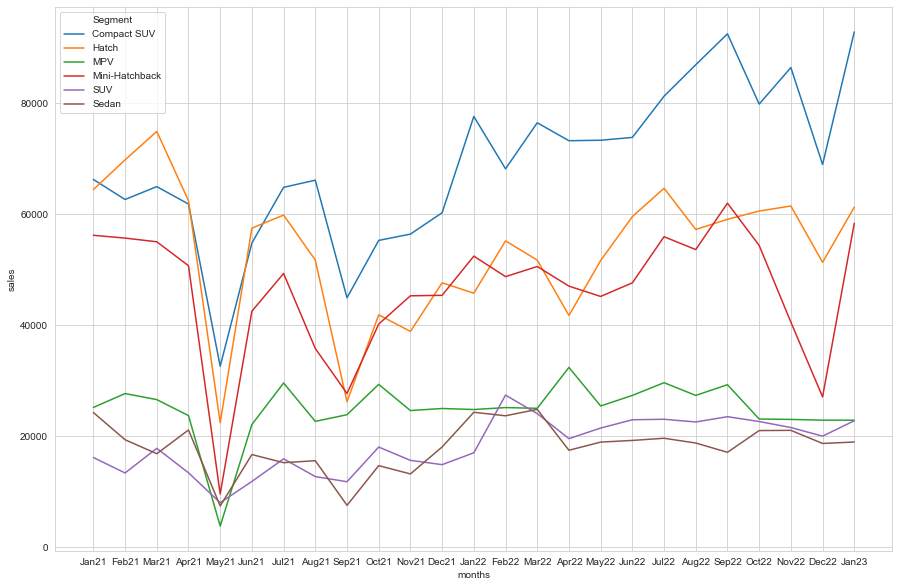

In [98]:
# Observe that over the time period, there is an increased demand for Hatches and compact SUV's.
# Whereas, demand for SUV's, MPV's and Sedans is almost stagnant.

plt.figure(figsize=(15,10))
sns.lineplot(x='months', y='sales', hue='Segment', data=grpdseg )

In [ ]:
# Conclusion:

# Segmentwise, Compact SUV and Hatchbacks are the most popular interms of number of sales.
# The surge in demand for compact SUV's and Hatchbacks is substantially higher compared to other segments. Also, they may be
# expected to expand further in the coming years. The stagnant sales of SUV's, MPV's and Sedans make these segments a bit unattractive.

# Regards to the price range, the cars prized in the 6-15 lakhs range are enjoying extensive demand.
